In [14]:
# Import all the necessary packages: Pandas, NumPy, SciPy, Sklearn, StatsModels.
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

# Upload the CSV file.
oysters = pd.read_csv('LSE_DA301_Week_2_files/Data/oysters.csv')  


oysters 


,sex,length,diameter,height,total_weight,raw_weight,intestines_weight,shell_weight,age
0,male,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,female,0.575,0.475,0.160,0.8950,0.3605,0.2210,0.2710,9
2,male,0.575,0.450,0.155,0.8860,0.3605,0.2110,0.2575,9
3,infant,0.580,0.460,0.140,0.9265,0.4135,0.1845,0.2700,10
4,infant,0.580,0.460,0.140,0.8295,0.3915,0.1650,0.2380,10
...,...,...,...,...,...,...,...,...,...
9479,male,0.465,0.355,0.105,0.4795,0.2270,0.1240,0.1250,8
9480,female,0.540,0.475,0.155,1.2170,0.5305,0.3075,0.3400,16
9481,female,0.450,0.355,0.105,0.5225,0.2370,0.1165,0.1450,8
9482,female,0.575,0.445,0.135,0.8830,0.3810,0.2035,0.2600,11


In [3]:
oysters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9484 entries, 0 to 9483
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                9484 non-null   object 
 1   length             9484 non-null   float64
 2   diameter           9484 non-null   float64
 3   height             9484 non-null   float64
 4   total_weight       9484 non-null   float64
 5   raw_weight         9484 non-null   float64
 6   intestines_weight  9484 non-null   float64
 7   shell_weight       9484 non-null   float64
 8   age                9484 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 667.0+ KB


In [15]:
oysters_sex=oysters['sex'].value_counts()

# Print the contents.
print(oysters_sex) 

male      3561
female    3113
infant    2810
Name: sex, dtype: int64


In [16]:
# Set the independent and dependent variables:
# Set the independent variable.  
X = oysters.drop(['sex'], axis=1) 
# Set the dependent variable. 
y = oysters['sex']   

# Print to check sex column was dropped.
print(list(X.columns.values))  

# Specify the train and test data sets and 
# use 30% as the 'test_size' and a random_state of one.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.30, random_state = 1, stratify=y) 

# Print the shape of all the train and tests sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['length', 'diameter', 'height', 'total_weight', 'raw_weight', 'intestines_weight', 'shell_weight', 'age']
(6638, 8)
(2846, 8)
(6638,)
(2846,)


In [17]:
# -----------------------------------
# Scale the features between 0 and 1
# -----------------------------------

# Import the MinMaxScaler to normalise the data.
from sklearn.preprocessing import MinMaxScaler  

# Create a function and set values.
scaler = MinMaxScaler(feature_range = (0,1))  

# Add the X_train data set to the 'scaler' function.
scaler.fit(X_train)

# Specify X_train data set.
X_train = scaler.transform(X_train) 
# Specify X_test data set. 
X_test = scaler.transform(X_test)  
X_test

array([[0.77027027, 0.79831933, 0.17256637, ..., 0.38709677, 0.37070254,
        0.32142857],
       [0.64189189, 0.59663866, 0.13274336, ..., 0.24423963, 0.27254609,
        0.39285714],
       [0.80405405, 0.78991597, 0.17699115, ..., 0.39038841, 0.65321375,
        0.35714286],
       ...,
       [0.69594595, 0.66386555, 0.11061947, ..., 0.19881501, 0.24265072,
        0.28571429],
       [0.68243243, 0.63865546, 0.12389381, ..., 0.28439763, 0.20727454,
        0.28571429],
       [0.27027027, 0.25210084, 0.06637168, ..., 0.03686636, 0.03338316,
        0.17857143]])

In [18]:
# -----------------------------------
# Build a MLR model (using sklearn)
# -----------------------------------

# Define the MLR model and  set predictions and parameters.
MLR = LogisticRegression(random_state=0, 
                         multi_class='multinomial', 
                         penalty='none', 
                         solver='newton-cg').fit(X_train, y_train)
# Set the predictions equal to the ‘MLR’ function and 
# specify the DataFrame.
preds = MLR.predict(X_test) 

# Set the parameters equal to the DataFrame and 
# add the ‘get_params’ function. 
params = MLR.get_params() 

# Print the parameters of the model.
print(params)  

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [19]:
# view intercept and coefficients
print("Intercept: \n", MLR.intercept_)
print("Coefficients: \n", MLR.coef_)

Intercept: 
 [-1.84883052  1.60340815  0.24542236]
Coefficients: 
 [[ -5.81737518   5.78010798   5.43329375   5.13194905  -5.01938142
    4.32807676  -1.07708309   1.35837281]
 [ 10.24643799  -6.10005717  -7.87925868 -11.4877939    6.38647702
   -6.62219485   1.90516523  -3.11254824]
 [ -4.42906281   0.3199492    2.44596494   6.35584485  -1.3670956
    2.29411808  -0.82808214   1.75417544]]


In [20]:
# -----------------------------------
# Build a model (using statsmodels MNLogit())
# -----------------------------------
# Not sure why, but we seem to be doing the same thing, just using statsmodels's MNLogit()
# rather than sklearn.linear_model.logisticRegression


# Name the model and [2] Set model to the function.
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model

# Specify how the function returns the results.
result=logit_model.fit()  

# Print the report as a result.summary() function: 
print("Summary for Sex:I/M :\n ", result.summary())


Optimization terminated successfully.
         Current function value: 0.854457
         Iterations 8
Summary for Sex:I/M :
                            MNLogit Regression Results                          
Dep. Variable:                    sex   No. Observations:                 6638
Model:                        MNLogit   Df Residuals:                     6620
Method:                           MLE   Df Model:                           16
Date:                Wed, 27 Jul 2022   Pseudo R-squ.:                  0.2189
Time:                        19:10:24   Log-Likelihood:                -5671.9
converged:                       True   LL-Null:                       -7261.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
sex=infant       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4522      0.316     10.913      0.000       2.832       4.072
x1   

In [21]:
# Create and print a confusion matrix:
# y_test as the first argument and the predictions as the second argument. 
confusion_matrix(y_test, preds)

# Transform confusion matrix into an array:
cmatrix = np.array(confusion_matrix(y_test, preds))

# Create the DataFrame from cmatrix array. 
pd.DataFrame(cmatrix, index=['female','infant', 'male'],
columns=['predicted_female', 'predicted_infant', 'predicted_male'])

,predicted_female,predicted_infant,predicted_male
female,314,160,460
infant,57,676,110
male,304,244,521


In [22]:
# Determine accuracy statistics:
print('Accuracy score:', metrics.accuracy_score(y_test, preds))  

# Create classification report:
class_report=classification_report(y_test, preds)

print(class_report)

Accuracy score: 0.5309205903021785
              precision    recall  f1-score   support

      female       0.47      0.34      0.39       934
      infant       0.63      0.80      0.70       843
        male       0.48      0.49      0.48      1069

    accuracy                           0.53      2846
   macro avg       0.52      0.54      0.53      2846
weighted avg       0.52      0.53      0.52      2846



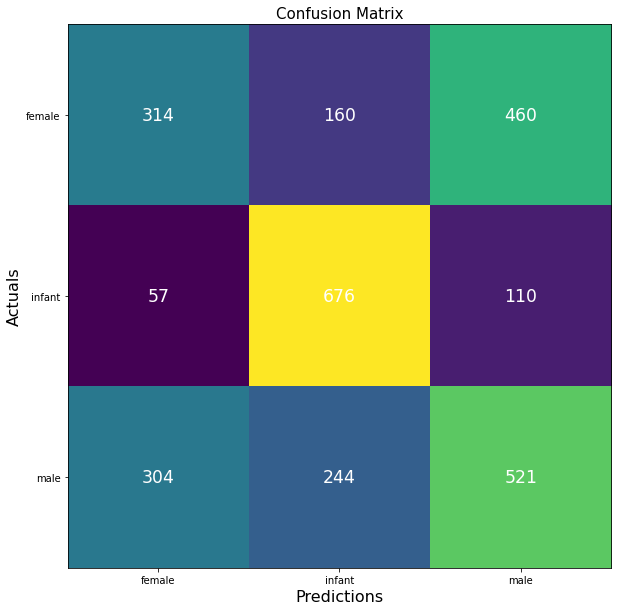

In [23]:
# Import matplotlib to create a visualisation.
import matplotlib.pyplot as plt  

# Define confusion matrix.
cm = confusion_matrix(y_test, preds)  

# Create visualisation for the MLR:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('female', 'infant', 'male'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('female', 'infant', 'male'))

# ax.set_ylim(1.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', size='xx-large')
        
# Sets the labels.
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)

plt.show()